In [5]:
#1.

import pandas as pd
import statistics as stat
df = pd.read_csv("C:/ADIT'S FOLDER/DOCUMENTS/PES University/SEMESTER 3/SDS/SEM 3 (SDS)/titanic.csv")
for col in df.columns:
  if pd.api.types.is_numeric_dtype(df[col]):
    if pd.api.types.is_integer_dtype(df[col]):
      print(f"{col}: ordinal")
  else:
    print(f"{col}: nominal")
print("Age: interval")
print("Fare: ratio")

#

PassengerId: ordinal
Survived: ordinal
Pclass: ordinal
Name: nominal
Sex: nominal
SibSp: ordinal
Parch: ordinal
Ticket: nominal
Cabin: nominal
Embarked: nominal
Age: interval
Fare: ratio


In [13]:
#2.

import pandas as pd
import numpy as np


titanic_data = pd.read_csv('titanic.csv')

# Summary statistics for each column
summary_stats = []

for column in titanic_data.columns:
    if titanic_data[column].dtype in [np.int64, np.float64]:
        mean_value = titanic_data[column].mean()
        median_value = titanic_data[column].median()
        mode_value = titanic_data[column].mode().iloc[0]
        std_dev = titanic_data[column].std()
        data_range = titanic_data[column].max() - titanic_data[column].min()
        summary_stats.append({
            'Column': column,
            'Mean': mean_value,
            'Median': median_value,
            'Mode': mode_value,
            'Standard Deviation': std_dev,
            'Range': data_range
        })

summary_stats_df = pd.DataFrame(summary_stats)
print(summary_stats_df)

        Column        Mean    Median   Mode  Standard Deviation     Range
0  PassengerId  446.000000  446.0000   1.00          257.353842  890.0000
1     Survived    0.383838    0.0000   0.00            0.486592    1.0000
2       Pclass    2.308642    3.0000   3.00            0.836071    2.0000
3          Age   29.699118   28.0000  24.00           14.526497   79.5800
4        SibSp    0.523008    0.0000   0.00            1.102743    8.0000
5        Parch    0.381594    0.0000   0.00            0.806057    6.0000
6         Fare   32.204208   14.4542   8.05           49.693429  512.3292


In [17]:
#3.

import pandas as pd
data=pd.read_csv("C:/ADIT'S FOLDER/DOCUMENTS/PES University/SEMESTER 3/SDS/SEM 3 (SDS)/titanic.csv")
data
missing_values=["NULL","N/a","na","NaN"," ","NA","null"]
data_new=pd.read_csv("C:/ADIT'S FOLDER/DOCUMENTS/PES University/SEMESTER 3/SDS/SEM 3 (SDS)/titanic.csv", na_values=missing_values)
data_new
data_interpol=data_new.interpolate()
data_interpol
data_1=data_new.drop(labels='Cabin',axis=1)
data_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


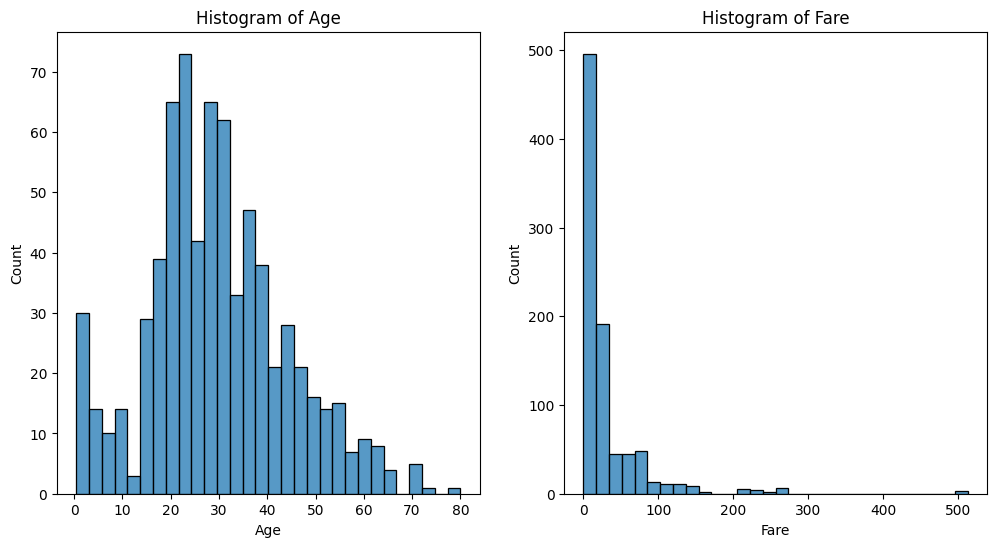

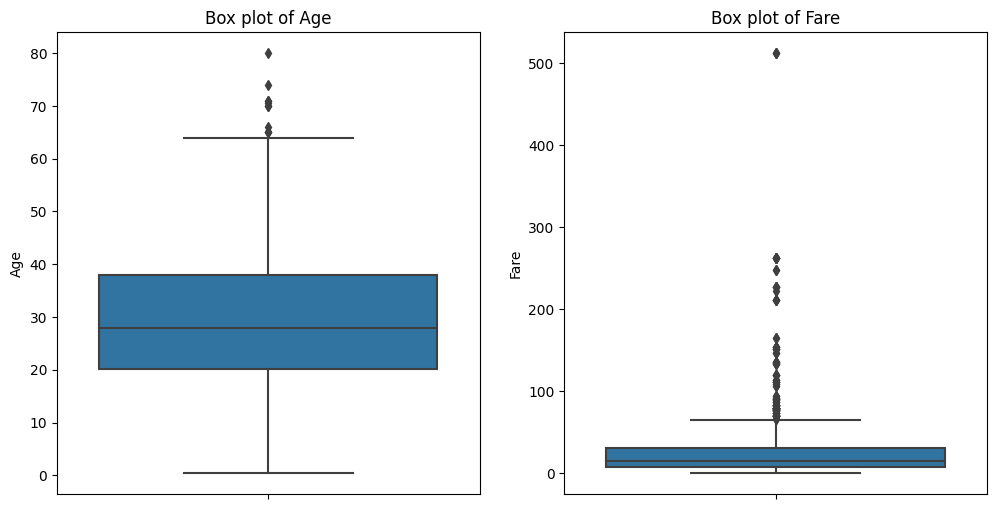

In [18]:
#4.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('titanic.csv')

# Create histograms for 'Age' and 'Fare'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=False, bins=30)
plt.title('Histogram of Age')

plt.subplot(1, 2, 2)
sns.histplot(df['Fare'], kde=False, bins=30)
plt.title('Histogram of Fare')
plt.show()

# Create box plots for 'Age' and 'Fare'
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(y=df['Age'])
plt.title('Box plot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['Fare'])
plt.title('Box plot of Fare')
plt.show()

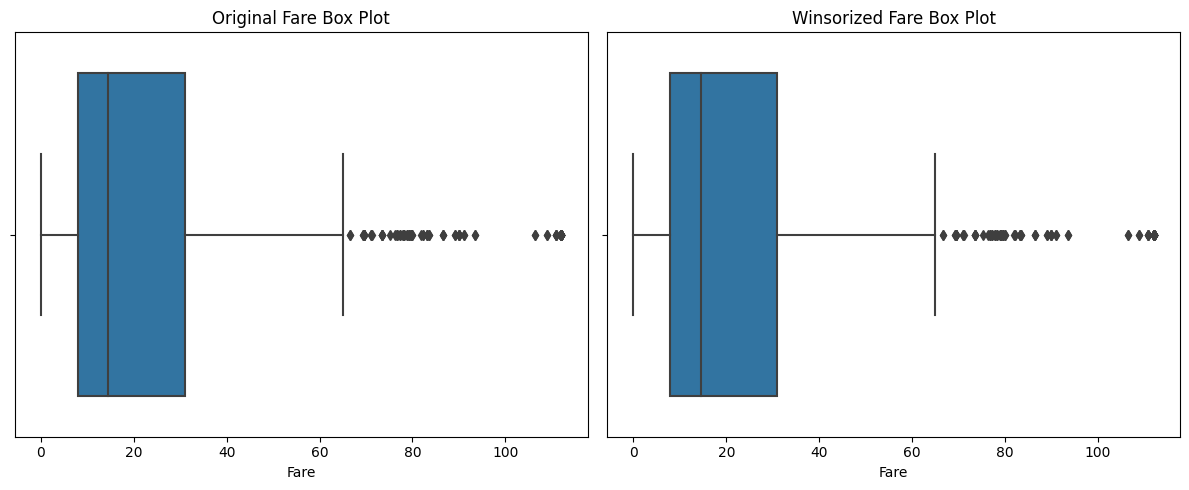

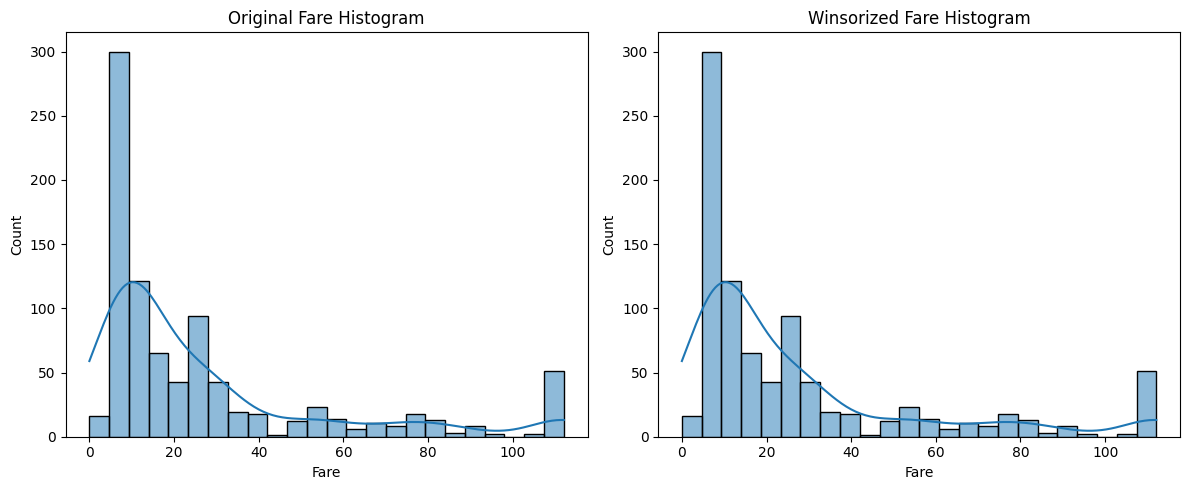

In [20]:
#5.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

titanic_data = pd.read_csv('titanic.csv')

titanic_data['Fare'] = titanic_data['Fare'].clip(upper=titanic_data['Fare'].quantile(0.95))

# Create subplots for the original and modified 'Fare' box plots
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x=titanic_data['Fare'])
plt.title('Original Fare Box Plot')

plt.subplot(1, 2, 2)
sns.boxplot(x=titanic_data['Fare'])
plt.title('Winsorized Fare Box Plot')

plt.tight_layout()
plt.show()

# Create subplots for the original and modified 'Fare' histograms
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(titanic_data['Fare'], kde=True)
plt.title('Original Fare Histogram')

plt.subplot(1, 2, 2)
sns.histplot(titanic_data['Fare'], kde=True)
plt.title('Winsorized Fare Histogram')

plt.tight_layout()
plt.show()

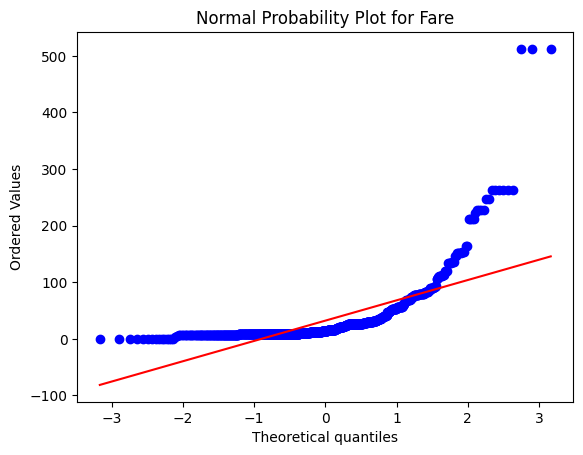

In [22]:
#6.

import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

missing_value=["null","NaN","NULL","na","nan","n/a","NA"," ","N/a"]
df=pd.read_csv("titanic.csv",na_values=missing_value)

fare = df['Fare'].dropna() 


stats.probplot(fare, dist="norm", plot=plt)

plt.title("Normal Probability Plot for Fare")
plt.show()

#As the points in the line are not properly co inciding, it is not distributed truly normally

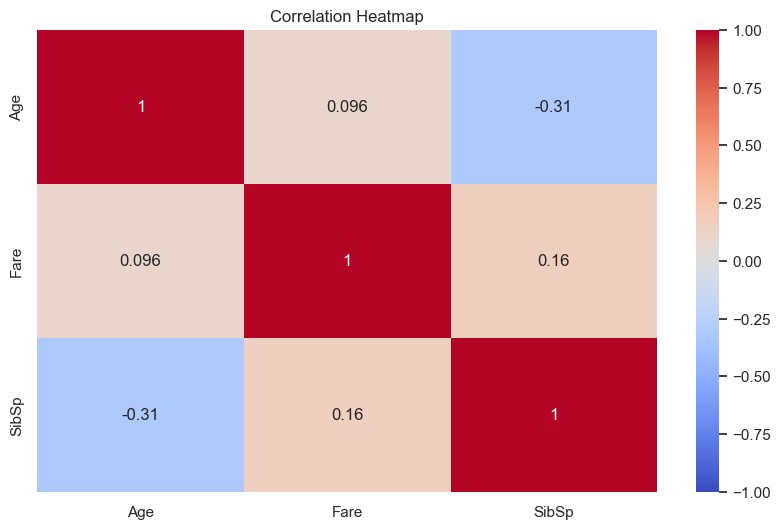

In [28]:
#7.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('titanic.csv')
numerical_columns = ['Age', 'Fare', 'SibSp']
data = df[numerical_columns]
correlation_matrix = data.corr()
correlation_threshold = 0.2 
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()


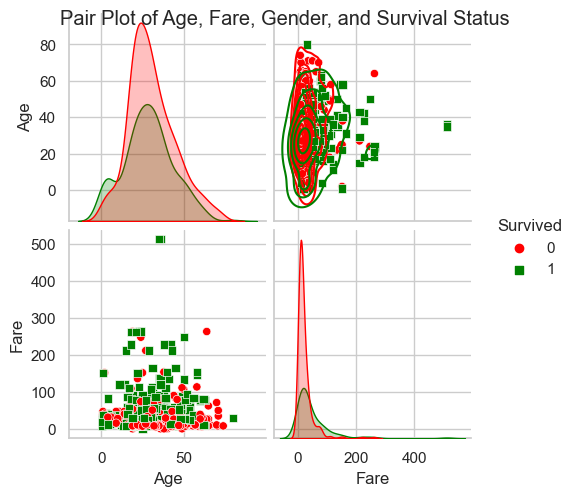

In [29]:
#8.

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

titanic_data = pd.read_csv('titanic.csv')

sns.set(style="whitegrid")
g = sns.pairplot(titanic_data, vars=['Age', 'Fare'], hue='Survived', markers=['o', 's'], palette={0: 'red', 1: 'green'})
g.map_upper(sns.kdeplot, cmap="Blues_d")
plt.suptitle("Pair Plot of Age, Fare, Gender, and Survival Status")
plt.show()

#The pairplot provides a valuable tool for exploring and visualizing the relationships between multiple variables in a 
#dataset. In the context of the Titanic dataset, it helps to understand the factors that contributed to survival rates
#among passengers of different ages, fares, and genders.

Reject the null hypothesis: There is a significant impact of Fare on survival.


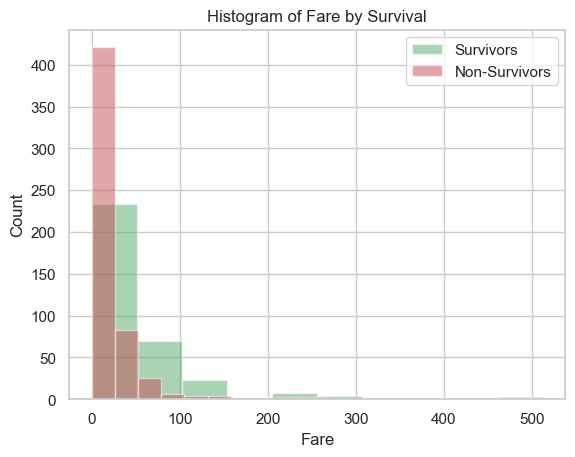

In [32]:
#9.

#NULL HYPOTHESIS 
#A null hypothesis is a type of conjecture in statistics that proposes that there is no difference between 
#certain characteristics of a population or data-generating process.

#ALTERNATE HYPOTHESIS
#The alternative hypothesis proposes that there is a difference.

# 1. Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

# 2. Load the Titanic dataset
titanic_data = pd.read_csv('titanic.csv') 

# 3. Separate the data into two groups: survivors and non-survivors
fare_survivors = titanic_data[titanic_data['Survived'] == 1]['Fare']
fare_non_survivors = titanic_data[titanic_data['Survived'] == 0]['Fare']

# 4. Perform a T-test to compare the two groups
t_statistic, p_value = stats.ttest_ind(fare_survivors, fare_non_survivors)

# 5. Set the significance level
alpha = 0.05

# 6. Check if the p-value is less than the significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant impact of Fare on survival.")
else:
    print("Fail to reject the null hypothesis: There is no significant impact of Fare on survival.")

# 7. Plot a histogram to visualize the results
plt.hist(fare_survivors, alpha=0.5, label='Survivors', color='g')
plt.hist(fare_non_survivors, alpha=0.5, label='Non-Survivors', color='r')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.legend()
plt.title('Histogram of Fare by Survival')
plt.show()

In [34]:
#10.

import pandas as pd
import numpy as np
from scipy import stats

# Load the Titanic dataset
df = pd.read_csv('titanic.csv')

# Separate the data into two groups based on survival
fare_survived = df[df['Survived'] == 1]['Fare']
fare_not_survived = df[df['Survived'] == 0]['Fare']

# Perform the t-test
t_stat, p_value = stats.ttest_ind(fare_survived, fare_not_survived, equal_var=False)

# Define the desired confidence level
confidence_level = 0.95

# Calculate the standard error of the difference in means
std_error = np.sqrt(np.var(fare_survived) / len(fare_survived) + np.var(fare_not_survived) / len(fare_not_survived))

# Determine the degrees of freedom
degrees_of_freedom = len(fare_survived) + len(fare_not_survived) - 2

# Calculate the critical value (two-tailed t-test)
alpha = 1 - confidence_level
critical_value = stats.t.ppf(1 - alpha / 2, degrees_of_freedom)

# Calculate the margin of error
margin_of_error = critical_value * std_error

# Print the results
print("T-Statistic:", round(t_stat, 5))
print("P-Value:", p_value)
print("Margin of Error:", round(margin_of_error, 5))

# Determine the confidence interval
mean_difference = np.mean(fare_survived) - np.mean(fare_not_survived)
confidence_interval = (round(mean_difference - margin_of_error, 5), round(mean_difference + margin_of_error, 5))
print("Confidence Interval:", confidence_interval)

T-Statistic: 6.8391
P-Value: 2.6993323503141236e-11
Margin of Error: 7.53041
Confidence Interval: (18.74711, 33.80793)
